In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd

In [19]:
X1 = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4,
                0.409, 0.421, 0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656,
                0.816, 0.853, 0.938, 1.036, 1.045])
X2 = X1**2

Y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()

alpha = 1e-4
iterations = 10000
lambda_reg = 1 


In [12]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function
def pred(theta0, theta1, theta2, X1, X2):
    return sigmoid(theta0 + theta1 * X1 + theta2 * X2)

# Cost function
def cost_function(Y_true, theta0, theta1, theta2):
    m = len(Y_true)
    Y_pred = pred(theta0, theta1, theta2, X1, X2)
    epsilon = 1e-15 
    cost = -(1/m) * np.sum(Y_true * np.log(Y_pred + epsilon) + (1 - Y_true) * np.log(1 - Y_pred + epsilon))
    
# Add L2 regularization term
    reg_term = (lambda_reg / (2 * m)) * (theta0**2 + theta1**2 + theta2**2)
    cost += reg_term
    return cost

# Gradient descent
def gradient_descent(Y_true, theta0, theta1, theta2, alpha, iterations):
    m = len(Y_true)
    for i in range(iterations):
        Y_pred = pred(theta0, theta1, theta2, X1, X2)
        grad0 = (1/m) * np.sum(Y_pred - Y_true) + (lambda_reg / m) * theta0
        grad1 = (1/m) * np.sum((Y_pred - Y_true) * X1) + (lambda_reg / m) * theta1
        grad2 = (1/m) * np.sum((Y_pred - Y_true) * X2) + (lambda_reg / m) * theta2
        
        theta0 -= alpha * grad0
        theta1 -= alpha * grad1
        theta2 -= alpha * grad2
    
    return theta0, theta1, theta2

theta0 = 0.279953; theta1 = 0.829183; theta2 = 0.258981


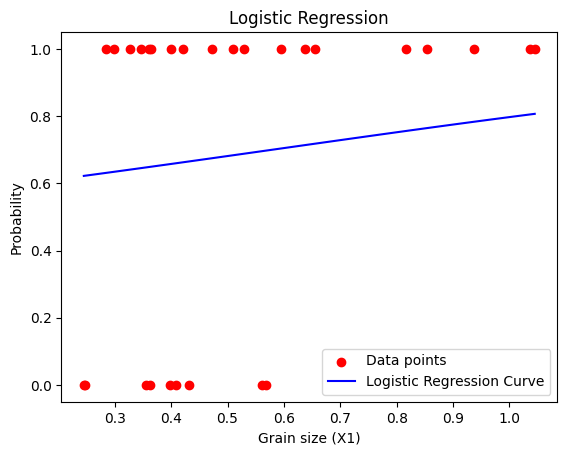

In [20]:
# Train the model
theta0, theta1, theta2 = gradient_descent(Y, theta0, theta1, theta2, alpha, iterations)
print(f"theta0 = {theta0:.6f}; theta1 = {theta1:.6f}; theta2 = {theta2:.6f}")

# Plotting the results
plt.scatter(X1, Y, color='red', label='Data points')
X_values = np.linspace(min(X1), max(X1), 100)
X2_values = X_values**2  # Calculate corresponding X2 values
Y_pred = pred(theta0, theta1, theta2, X_values, X2_values)
plt.plot(X_values, Y_pred, color='blue', label='Logistic Regression Curve')

plt.xlabel('Grain size (X1)')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [16]:
size = np.array([0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.60, 0.70, 0.80, 0.90, 1.00])
predict = sigmoid(theta0 + theta1 * size + theta2 * (size**2))

for s, p in zip(size, predict):
    if p >= 0.5:
        kq = "Có mặt"
    else:
        kq = "Vắng mặt"
    print(f"Với Grain size = {s} dự đoán là {kq}, {p:.2f}")

Với Grain size = 0.12 dự đoán là Có mặt, 0.61
Với Grain size = 0.15 dự đoán là Có mặt, 0.61
Với Grain size = 0.18 dự đoán là Có mặt, 0.62
Với Grain size = 0.21 dự đoán là Có mặt, 0.62
Với Grain size = 0.24 dự đoán là Có mặt, 0.63
Với Grain size = 0.27 dự đoán là Có mặt, 0.63
Với Grain size = 0.3 dự đoán là Có mặt, 0.64
Với Grain size = 0.33 dự đoán là Có mặt, 0.64
Với Grain size = 0.36 dự đoán là Có mặt, 0.65
Với Grain size = 0.39 dự đoán là Có mặt, 0.65
Với Grain size = 0.42 dự đoán là Có mặt, 0.66
Với Grain size = 0.45 dự đoán là Có mặt, 0.67
Với Grain size = 0.48 dự đoán là Có mặt, 0.67
Với Grain size = 0.51 dự đoán là Có mặt, 0.68
Với Grain size = 0.54 dự đoán là Có mặt, 0.69
Với Grain size = 0.57 dự đoán là Có mặt, 0.69
Với Grain size = 0.6 dự đoán là Có mặt, 0.70
Với Grain size = 0.7 dự đoán là Có mặt, 0.73
Với Grain size = 0.8 dự đoán là Có mặt, 0.75
Với Grain size = 0.9 dự đoán là Có mặt, 0.78
Với Grain size = 1.0 dự đoán là Có mặt, 0.81


HMMM,... Cíuuuu tôiiii